# Simplified version of Neher's Model in R

## Numbers 

$\beta_t = \beta_0  (1 + \epsilon \cos (2 \pi (time - \theta)))(1 - containment \times \frac{I^3} {k^3 + I^3}) \\
  infection = \frac{\beta_t  I  S} {N} \\
  \frac{dS}{dt} = \nu  N - infection - \mu S\\
  \frac{dE}{dt}= infection - (\sigma + \mu) E\\
  \frac{dI}{dt} = \sigma  E - (\alpha + \mu + \gamma) I\\
  \frac{dR}{dt} = \gamma I - \mu R $
 

In [1]:
require("epimdr")

Loading required package: epimdr
Loading required package: shiny
Loading required package: deSolve
Loading required package: polspline


In [21]:
plottime <- function(start, time, model, parms) {
  out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )
  Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
  out<-cbind( out, Nvec)
  plot(x = out[, "time"],    y = out[, "S"],    ylab = "Number",   xlab = "Time",    type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, parms[["N"]])
  )
  lines(x = out[, "time"], y = out[, "E"], col = "orange")
  lines(x = out[, "time"], y = out[, "I"], col = "red")
  lines(x = out[, "time"], y = out[, "R"], col = "green")
  lines(x = out[, "time"], y = out[, "Nvec"], col = "purple")  
  legend( "bottomright",legend = c("S", "E", "I", "R","N"), col = c("black", "orange", "red", "green","purple"),lty = 1,    cex = 0.8
  )
}

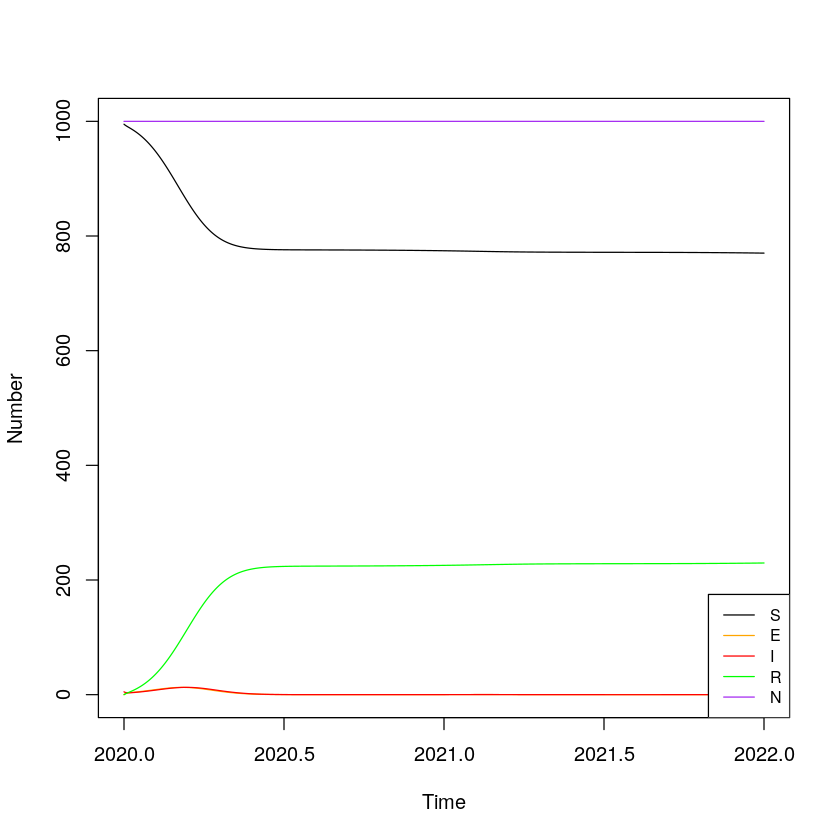

In [33]:
model <- function(time, values, parms) {
  #function where c changes with the climate and humidity at each timepoint
  #initial values
  S <- values[1]
  E <- values[2]
  I <- values[3]
  R <- values[4]
  #parameters
  #kappa0 <- parms[["kappa0"]]
  mu <- parms[["mu"]]
  sigma <- parms[["sigma"]]
  alpha <- parms[["alpha"]]
  gamma <- parms[["gamma"]]
  contact <- parms[["contact"]]
  #temp and humidity are vectors in this model
  f <- parms[["f"]]
  nu <- parms[["nu"]]
  N <- parms[["N"]]
  theta <- parms[["theta"]]
  containment <- parms[["containment"]]
  k <- parms[["k"]]
  epsilon <- parms[["epsilon"]]
  beta0 <- parms[["beta0"]]
  #model
  
  #seir model with varying beta values
  betat<- beta0 * (1 + epsilon * cos (2 * pi * (time - theta))) * (1 - containment * I^3 / (k^3 + I^3))
  infection <- betat * I * S / N 
  dS = nu * N - infection - mu * S
  dE = infection - (sigma + mu) * E
  dI = sigma * E - (alpha + mu + gamma) * I
  dR = gamma * I - mu * R 
 

  list(c(dS, dE, dI, dR))
}


time = seq(2020, 2022, by = 0.001)
#parameters from bjornstad book and guesses- just to test functions work! not sure if this is quite right
parms = list(
  mu = 0,
  alpha = 0.00, 
  f = 2,
  N = 1000,
  nu = 0.0,
    
  theta = 0 ,# where from,
  containment = 0.5 , #where from
  k = 0.03,
  epsilon = 0.4, #where from
  R0 = 2 ,
  beta0 = 2 * 72 , # where nos from
  sigma = 365/5 ,
  gamma = 72 )
                                    
start = c(S = parms[["N"]]-5,
          E = 0.00 ,
          I = 5,
          R = 0)
plottime(
  time = time,
  parms = parms,
  start = start,
  model = model
)


 out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )



## Proportion

$\beta_t = \beta_0  (1 + \epsilon \cos (2 \pi (time - \theta)))(1 - containment \times \frac{I^3} {k^3 + I^3}) \\
  infection = \beta_t  I  S\\
  \frac{dS}{dt} = \nu - infection - \mu S\\
  \frac{dE}{dt}= infection - (\sigma + \mu) E\\
  \frac{dI}{dt} = \sigma  E - (\alpha + \mu + \gamma) I\\
  \frac{dR}{dt} = \gamma I - \mu R $
 

here, S, E, I and R represent proportions in these categores  (S=X/N) where X is the true number of susceptibles and N is the population

In [19]:
plottime <- function(start, time, model, parms) {
  out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )
  Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
  out<-cbind( out, Nvec)
  plot(x = out[, "time"],    y = out[, "S"],    ylab = "Number",   xlab = "Time",    type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, parms[["N"]])
  )
  lines(x = out[, "time"], y = out[, "E"], col = "orange")
  lines(x = out[, "time"], y = out[, "I"], col = "red")
  lines(x = out[, "time"], y = out[, "R"], col = "green")
  lines(x = out[, "time"], y = out[, "Nvec"], col = "purple")  
  legend( "bottomright",legend = c("S", "E", "I", "R","N"), col = c("black", "orange", "red", "green","purple"),lty = 1,    cex = 0.8
  )
}

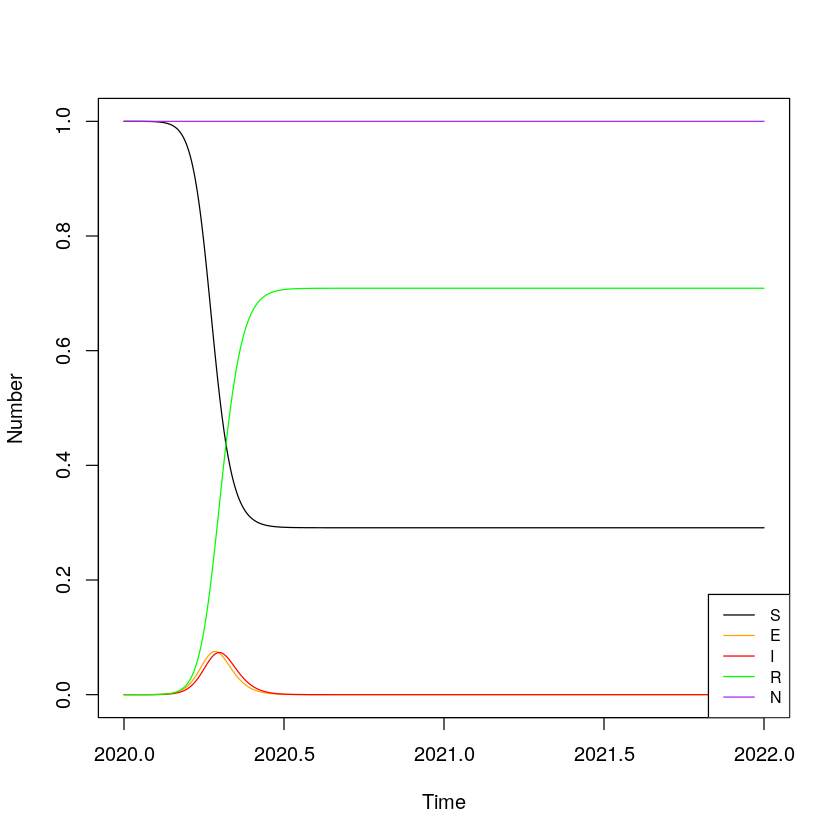

In [36]:
model <- function(time, values, parms) {
  #function where c changes with the climate and humidity at each timepoint
  #initial values
  S <- values[1]
  E <- values[2]
  I <- values[3]
  R <- values[4]
  #parameters
  #kappa0 <- parms[["kappa0"]]
  mu <- parms[["mu"]]
  sigma <- parms[["sigma"]]
  alpha <- parms[["alpha"]]
  gamma <- parms[["gamma"]]
  contact <- parms[["contact"]]
  #temp and humidity are vectors in this model
  f <- parms[["f"]]
  nu <- parms[["nu"]]
  N <- parms[["N"]]
  theta <- parms[["theta"]]
  containment <- parms[["containment"]]
  k <- parms[["k"]]
  epsilon <- parms[["epsilon"]]
  beta0 <- parms[["beta0"]]
  #model
  
  #seir model with varying beta values
  betat<- beta0 * (1 + epsilon * cos (2 * pi * (time - theta))) * (1 - containment * I^3 / (k^3 + I^3))
  infection <- betat * I * S  
  dS = nu - infection - mu * S
  dE = infection - (sigma + mu) * E
  dI = sigma * E - (alpha + mu + gamma) * I
  dR = gamma * I - mu * R 
 

  list(c(dS, dE, dI, dR))
}


time = seq(2020, 2022, by = 0.001)
#parameters from bjornstad book and guesses- just to test functions work! not sure if this is quite right
parms = list(
  mu = 0,
  alpha = 0.0000, 
  f = 2,
  N = 1,
  nu = 0.0,
    
  theta = 0 ,# where from,
  containment = 0.5 , #where from
  k = 0.3,
  epsilon = 0.4, #where from
  R0 = 2 ,
  beta0 = 2 * 72 , # where nos from
  sigma = 365/5 ,
  gamma = 72 )
                                    
start = c(S = 1,
          E = 0.00 ,
          I = 30/1e7,
          R = 0)
plottime(
  time = time,
  parms = parms,
  start = start,
  model = model
)

# Betat

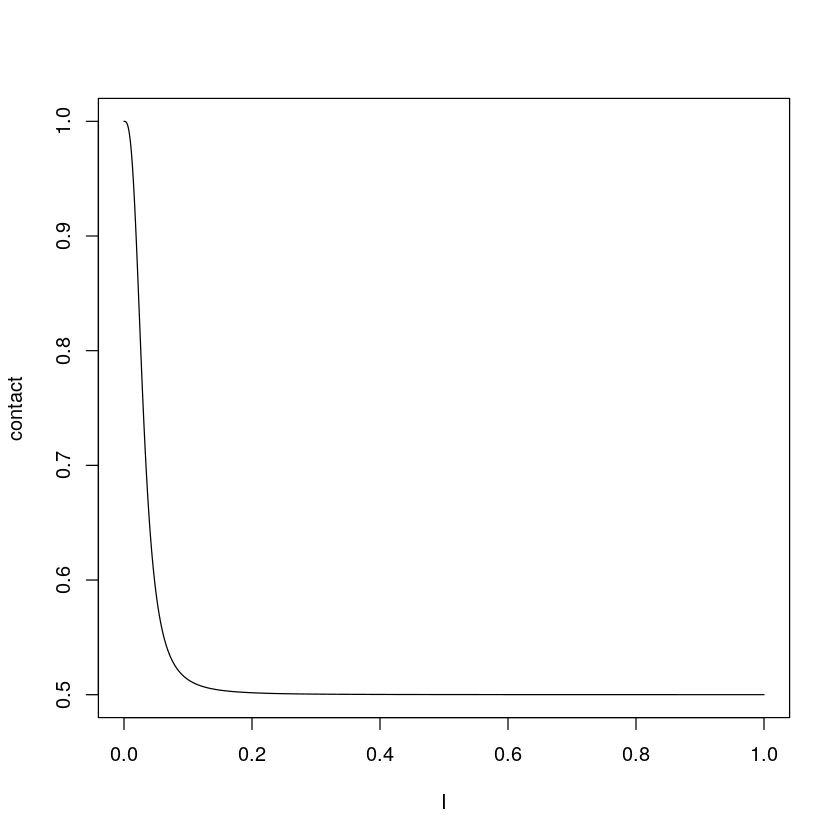

In [33]:
I<-seq(0,1,length.out = 1000)
containment=0.5 # the higher this is the lower the contact can get
k=0.03 #so I guess k represents when containment kicks in . contact gets lower more quickly when k is low
beta0=72*2
#the containment * 
contact<- (1- containment * I^3 / (k^3 + I^3)) 
# betat<- beta0 * (1 + epsilon * cos (2 * pi * (time - theta))) * ( contact)

plot(I,contact,type="l")

In [ ]:
parms = list(
    mu = 0.001,
    sigma = 0.25 ,
    alpha = 0.005,
    gamma = 1 / 2,
    contact = 1,
    c = 0.1,
    kappa0 = -2 / log(0.9))
    
par(mfrow = c(3, 3))
    
for (i in 1:(length(parms))) {
  parmschange<- parms 
    if (i != length(parms)) {
    x <- seq(0, 1, length.out = 100)
  } else{
    x <- seq(0, 50, length.out = 100)
  }
 
  
  parmschange[[i]] <- x
  R0 <-(parmschange[["sigma"]] / (parmschange[["mu"]] + parmschange[["sigma"]])) * ((-parmschange[["contact"]] *
        parmschange[["kappa0"]] * log(1 - parmschange[["c"]]))) / (parmschange[["alpha"]] + parmschange[["mu"]] + parmschange[["gamma"]])
  plot(x, R0, type = "l", xlab = names(parms[i]))
}



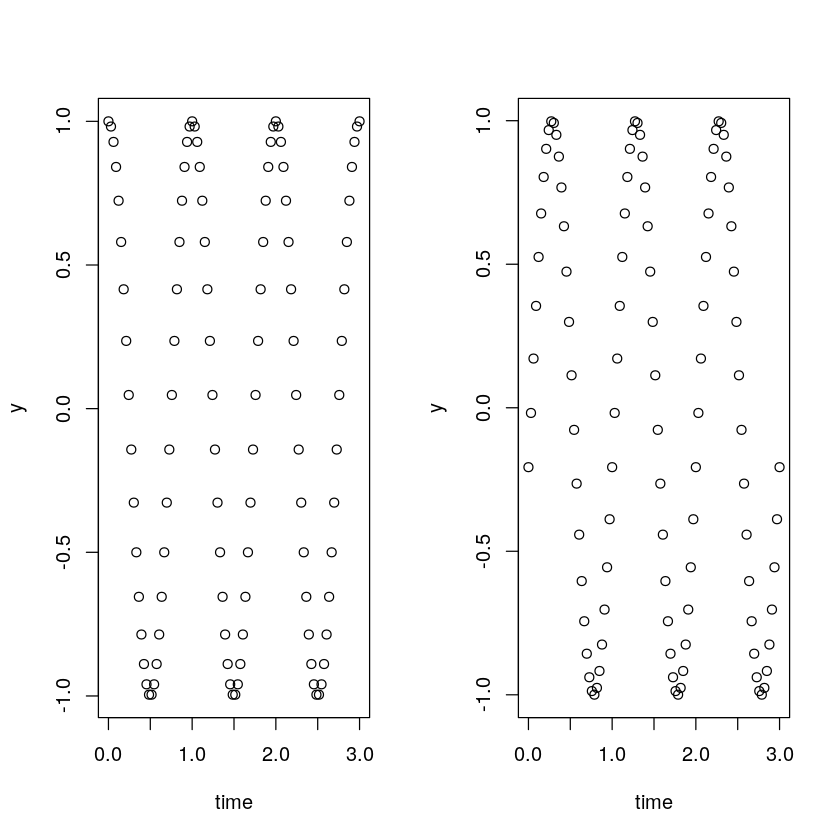

In [13]:
12.3/28


[1] 0.4392857